## Assignment 3: $k$ Nearest Neighbor

`! git clone https://github.com/ds3001f25/knn_assignment.git`

**Do two questions in total: "Q1+Q2" or "Q1+Q3"**


**Q1.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting?
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

In [ ]:
# Question 1.1 What is the difference between regression and classification?

# These are both types of predictors. The difference is in what exactly they predict.
# Regression is when we use algorithms and models to predict numeric outcomes.
# Classification is when we use the same methods to predict categorical outcomes.

In [ ]:
# Question 1.2 What is a confusion table? What does it help us understand about
# a model's performance?

# A confusion table is a way to test the fit of a predictive model on the actual
# data set for categorical data sets. It's a cross-tabulation of preducted values
# with actual values and it helps us understand how well a predictive model "fits"
# the actual data we give it. It looks for patterns in the predicted result and
# actual results, allowing us to record and analyze trends. "Accuracy" is how we
# quantify how "correct" the predictive model is.

In [ ]:
# Question 1.3 What does the SSE quantify about a particular model?

# The SSE (sum of squared errors) quantifies a model's accuracy. In other words,
# it quantifies how closely a model's predicted values fall from the true values
# it's being used to predict.

In [ ]:
# Question 1.4 What are overfitting and underfitting?

# Essentially, overfitting and underfitting are ways to look at a models sensitivity
# to noise and generalization -- whether they're overly exacting or overly simplistic.
# "Overfitting" is when a model examines a test data set and adapts to it's data
# points and characteristics to well, meaning that it has low error with the training
# data set but high error with a real data set. "Underfitting" is when your model is too
# simple and general and pays too little attention to the characteristic and traits of the
# training data (meaning it has high error for the training AND real data sets it
# processes). If K is very small, it will lead to overfitting. It is very large, underfitting.

In [ ]:
# Question 1.5 Why does splitting the data into training and testing sets,
# and choosing  𝑘  by evaluating accuracy or SSE on the test set, improve model performance?

# This method improves model performance because it enables us to see how the model
# adapts to the "test set" (a set the model hasn't seen) to ensure that overfitting
# or underfitting hasn't occured. By choosing k by evaluating accuracy/SSE on the test set,
# we can make sure that the K doesn't let to overfitting by being overly reliant on the
# training data. This way, we strike a balance between accuracy and applicability.
# The k is somewhere in the middle, meaning it will use the training data to yield a k
# that we can then use to extract meaningful and trustworthy predictions when used
# on later test sets. Were we to choose K by accuracy/SSE on the training set,
# we would get a model that overfits and is too sensitive to the noise of the
# training set (since the model's only reference is the training set).

In [ ]:
# Question 1.6 With classification, we can report a class label as a prediction
# or a probability distribution over class labels. Please explain the strengths
# and weaknesses of each approach.

# Class labels as predictions -
# The benefit to reporting class labels as predictions is that it enables us to examine
# the relative likelihood of one class label to the others. In other words, we can
# make a singular prediction that X class label is the most likely label to occur.
# The downside is that this doesn't give us a comprehensive overview each class label's
# relative likelihood. For instance, X may be the MOST likely class, but perhaps Y
# and Z are also both pretty likely to happen, making a class label as prediction
# approach somewhat limiting in understanding the liklihood of all the possible outcomes.


# Probability distribution over class labels -
# Similarly, a probibility distribution over class labels approach gives us a broader view
# into all the different class labels' relative liklihood. However, this method lacks
# the specialized insight into a singular class label's liklihood, as well as being
# overly-sensitive to skewed data. Let's say that there were 10 concentrated entries for X
# and Y was an outlier. This method might give Y unfairly increased representation.



**Q2.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [31]:
# Question 2.1 Load the ./data/USA_cars_datasets.csv. Keep the following variables
# and drop the rest: price, year, mileage. Are there any NA's to handle? Look at
# the head and dimensions of the data.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

cars = pd.read_csv("USA_cars_datasets.csv")

cars_test = cars[["price", "year", "mileage"]]

print("Missing values per column:\n", cars_test.isna().sum())
# Shows no missing values (NA's) for our variables of interest (price, year, mileage)

print(cars_test.head(10))

print(cars_test.shape)


Missing values per column:
 price      0
year       0
mileage    0
dtype: int64
   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654
5   5700  2018    45561
6   7300  2010   149050
7  13350  2017    23525
8  14600  2018     9371
9   5250  2017    63418
(2499, 3)


In [32]:
# Question 2.2 Maxmin normalize year and mileage.

import pandas as pd
from sklearn.neighbors import KNeighborsRegressor

cars_test = cars_test[["price", "year", "mileage"]]

y = cars_test["price"]
X = cars_test.loc[:, ["year", "mileage"]]

print("Original features:")
print(X.head())

def maxmin(z):
    return (z - z.min()) / (z.max() - z.min())

X = X.apply(maxmin)

print("\nNormalized features:")
print(X.head())

Original features:
   year  mileage
0  2008   274117
1  2011   190552
2  2018    39590
3  2014    64146
4  2018     6654

Normalized features:
       year   mileage
0  0.744681  0.269287
1  0.808511  0.187194
2  0.957447  0.038892
3  0.872340  0.063016
4  0.957447  0.006537


In [35]:
# Question 2.3 Split the sample into ~80% for training and ~20% for evaluation.
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(cars_test, test_size=0.2, random_state=42)

print("Training set shape:", train_set.shape)
print("Evaluation set shape:", test_set.shape)

Training set shape: (1999, 3)
Evaluation set shape: (500, 3)


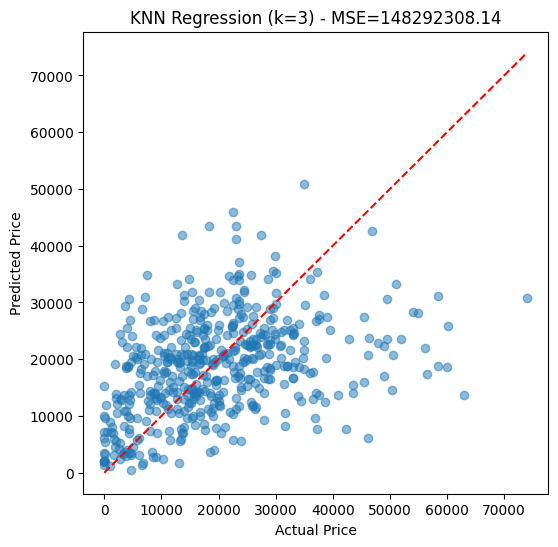

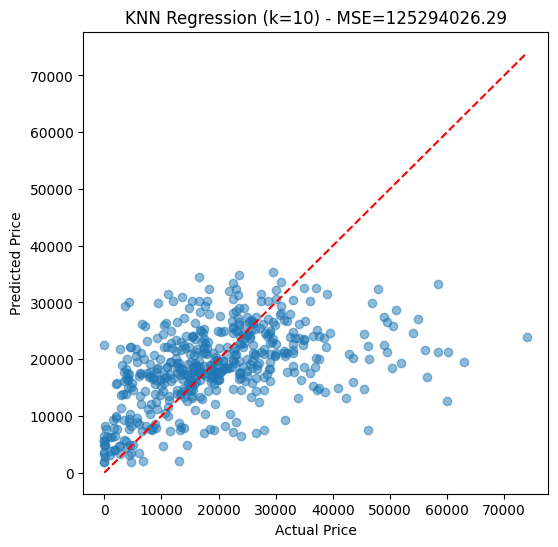

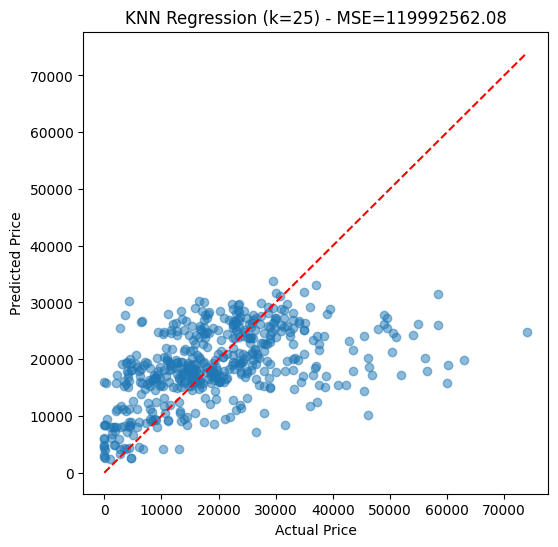

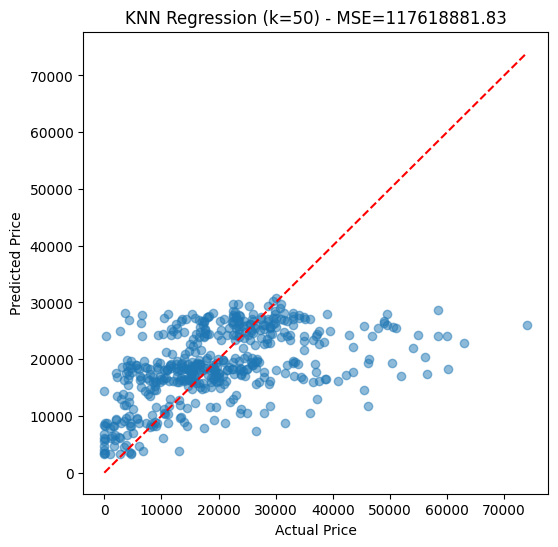

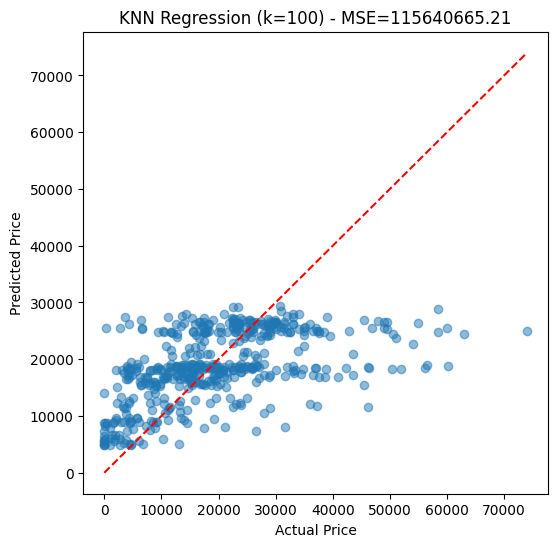

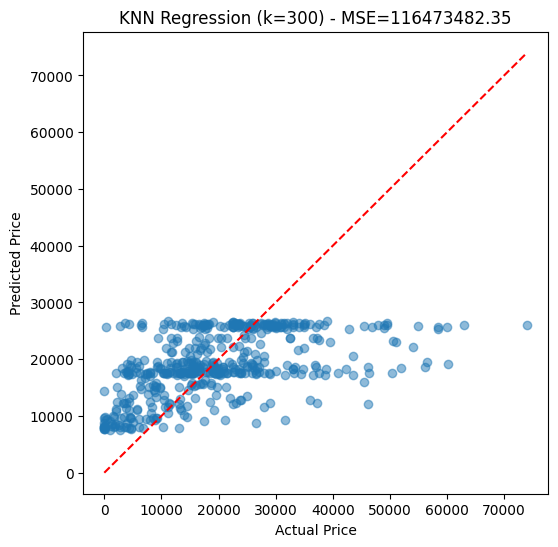

Mean Squared Errors by k:
k=3: MSE=148292308.14
k=10: MSE=125294026.29
k=25: MSE=119992562.08
k=50: MSE=117618881.83
k=100: MSE=115640665.21
k=300: MSE=116473482.35


In [38]:
# Question 2.4 Use the  𝑘 NN algorithm and the training data to predict price
# using year and mileage for the test set for  𝑘=3,10,25,50,100,300 .
# For each value of  𝑘 , compute the mean squared error and print a scatterplot
# showing the test value plotted against the predicted value.
# What patterns do you notice as you increase  𝑘 ?

from sklearn.metrics import mean_squared_error

X_train = train_set[["year", "mileage"]]
y_train = train_set["price"]
X_test = test_set[["year", "mileage"]]
y_test = test_set["price"]

k_values = [3, 10, 25, 50, 100, 300]

results = {}

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    results[k] = mse

    plt.figure(figsize=(6,6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"KNN Regression (k={k}) - MSE={mse:.2f}")
    plt.show()

print("Mean Squared Errors by k:")
for k, mse in results.items():
    print(f"k={k}: MSE={mse:.2f}")



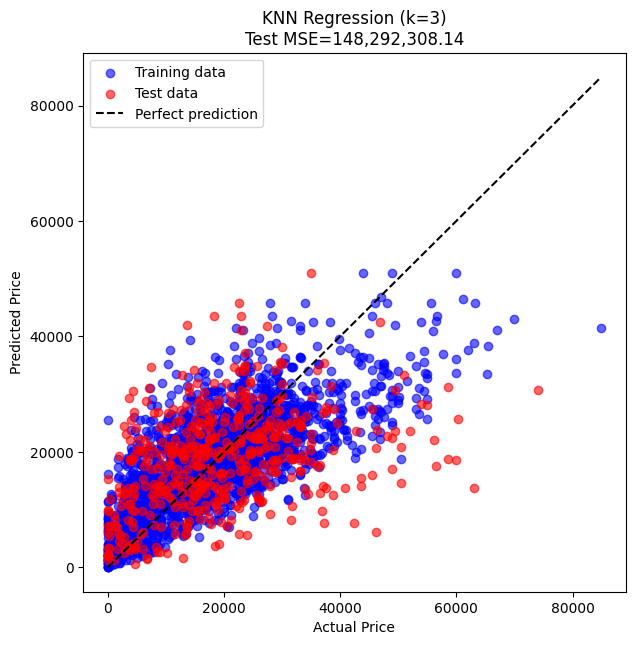

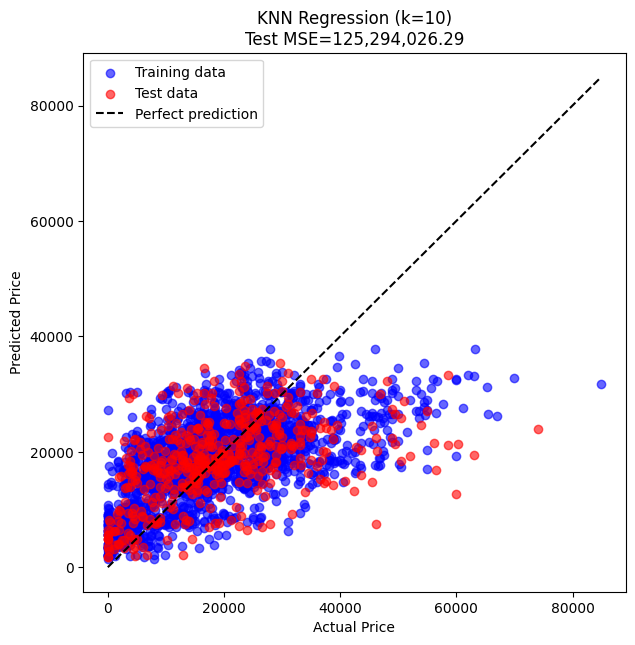

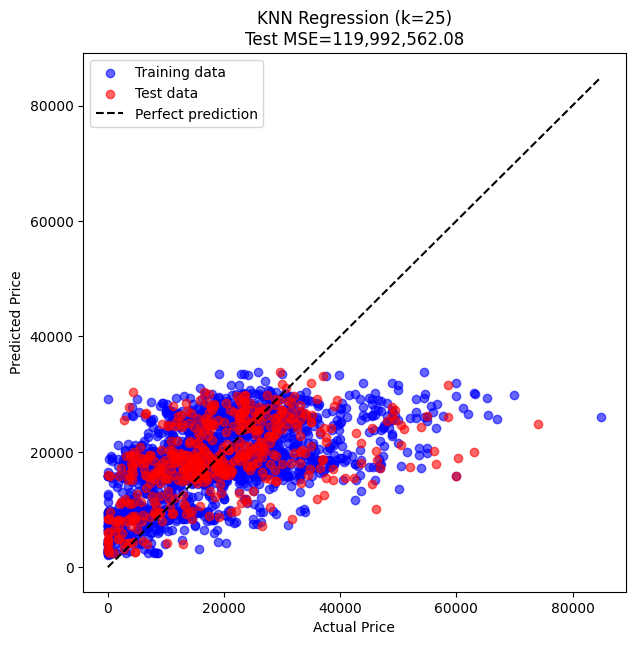

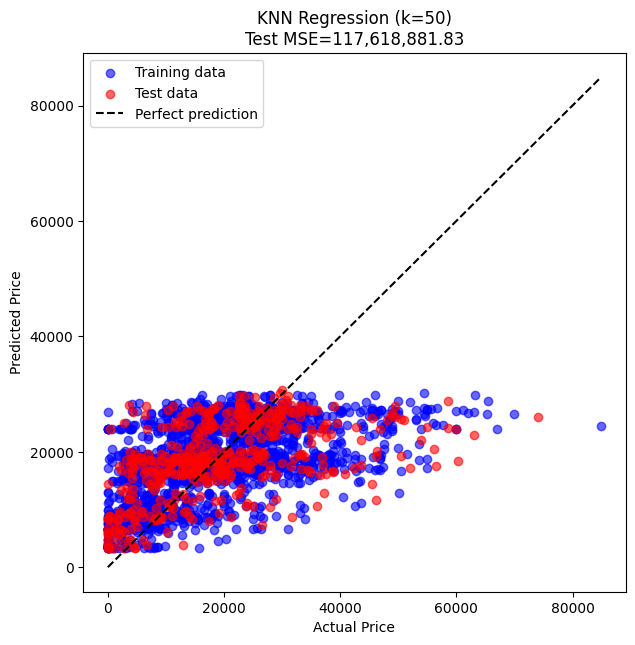

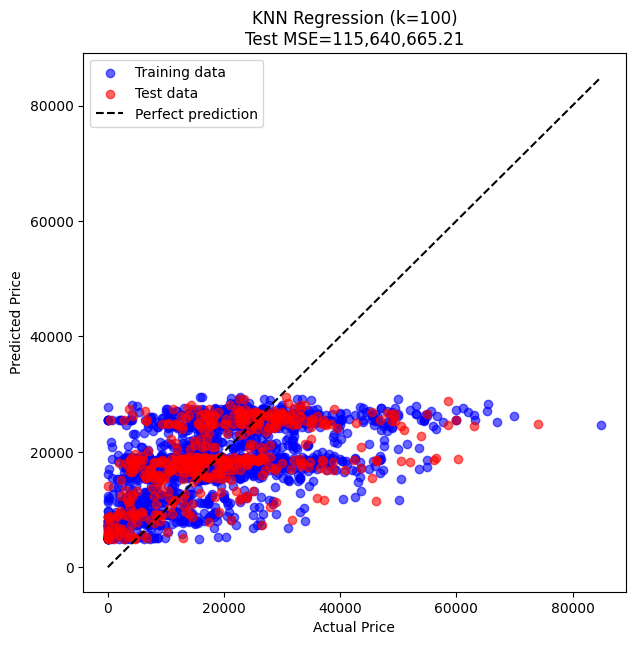

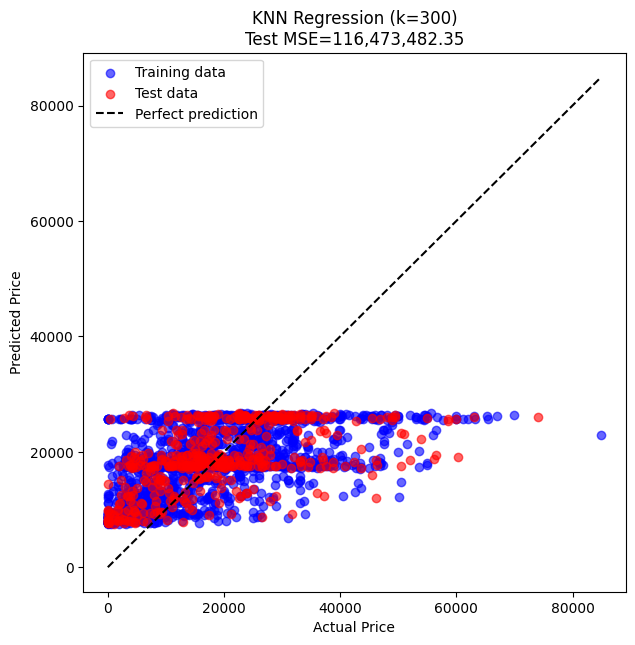

In [42]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

k_values = [3, 10, 25, 50, 100, 300]

for k in k_values:
    # --- Train model ---
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_eval_pred = model.predict(X_test)

    # Compute MSE for test set
    mse = mean_squared_error(y_test, y_eval_pred)

    # --- Plot ---
    plt.figure(figsize=(7,7))

    # Training data (blue)
    plt.scatter(y_train, y_train_pred, color="blue", alpha=0.6, label="Training data")

    # Test data (red)
    plt.scatter(y_test, y_eval_pred, color="red", alpha=0.6, label="Test data")

    # 45-degree line
    lims = [
        min(y_train.min(), y_test.min(), y_train_pred.min(), y_eval_pred.min()),
        max(y_train.max(), y_test.max(), y_train_pred.max(), y_eval_pred.max())
    ]
    plt.plot(lims, lims, "k--", label="Perfect prediction")

    # Labels, title, legend
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"KNN Regression (k={k})\nTest MSE={mse:,.2f}")
    plt.legend()
    plt.show()


In [ ]:
# Question 2.5 Determine the optimal  𝑘  for these data.

# The optimal K would be where k=100 because this returns the lowest mean squared error.

In [ ]:
# Question 2.6 Describe what happened in the plots of predicted versus actual
# prices as  𝑘  varied, taking your answer into part 6 into account.
# (Hint: Use the words "underfitting" and "overfitting".)

# We can see that as k increases, the scatter plot data become incresingly concentrated
# and confined between the y values of roughly 7000 and 26000. In other words,
# they gradually move from underfitting the data (being to simplistic and unspecific)
# to overfitting the data (being overly specific and sensitive to noise). What we
# want then is a happy medium where the error is the lowest. We want this because
# we want an algorithm that's been trained on part of a data set and evaluated
# by giving it test data. That way, we can ensure that the algorithm will model
# the test data in a way that doesn't fully mirror the training data but is still
# sensitive to the training data's features.

**Q3.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.

In [ ]:
## ----- DON'T DO ------ ##